# DAT405/DIT406 Introduction to Data Science and AI
## Assignment 4: Spam classification using Naïve Bayes


### Anh Thu DOAN
#### Exchange student from CY Tech - France to GU CSE Department
##### 12 hours spent

### Khushi Chitra Uday
#### Exchange student from CY Tech - France to GU CSE Department
##### 10 hours spent


### Group 26

In [1]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Preprocessing:

In [2]:
# Load the data using sklearn.datasets.load_files function
es_df = load_files("data/easy-spam",encoding= "latin-1")
hs_df = load_files("data/hard-spam",encoding= "latin-1")

In [3]:
# How many easy ham emails in easy & spam data set:
cpt = 0
for i in range(len(es_df.target)):
    if es_df.target[i] == 0:
        cpt +=1
print('There are', cpt,'easy ham emails in easy & spam data set')

There are 2551 easy ham emails in easy & spam data set


In [4]:
# How many spam emails in easy & spam data set:
cpt = 0
for i in range(len(es_df.target)):
    if es_df.target[i] == 1:
        cpt +=1
print('There are', cpt,'spam emails in easy & spam data set')

There are 501 spam emails in easy & spam data set


In [5]:
# How many hard ham emails in hard & spam data set:
cpt = 0
for i in range(len(hs_df.target)):
    if hs_df.target[i] == 0:
        cpt +=1
print('There are', cpt,'hard ham emails in hard & spam data set')

There are 250 hard ham emails in hard & spam data set


In [6]:
# How many spam emails in hard & spam data set:
cpt = 0
for i in range(len(hs_df.target)):
    if hs_df.target[i] == 1:
        cpt +=1
print('There are', cpt,'spam emails in hard & spam data set')

There are 501 spam emails in hard & spam data set


In [7]:
# Split the easy&spam data into 0.3
easy_train, easy_test, spam1_train, spam1_test = train_test_split(es_df.data, es_df.target, test_size=0.3, random_state=0)

In [8]:
# Split the hard&spam data into training set(70%) and test set (30%)
hard_train, hard_test, spam2_train, spam2_test = train_test_split(hs_df.data, hs_df.target, test_size=0.3, random_state=0)

In [9]:
cv = CountVectorizer()

In [10]:
def run_multi_naiveBayes(ham_train, ham_test, spam_train, spam_test):
    
    # Learn the vocabulary dictionary and return document-term matrix.
    X_train = cv.fit_transform(ham_train)
    
    # transform all of the features on test data
    x_test = cv.transform(ham_test)

    #y_train = spam_train.astype('int')
    
    multi = MultinomialNB()
    
    multi.fit(X_train, spam_train)
    predm = multi.predict(x_test)
    scorem = accuracy_score(spam_test,predm)
    cmm = confusion_matrix(spam_test, predm)
    dispm = ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = multi.classes_)
    dispm = dispm.plot(cmap=plt.cm.Blues,values_format='g')
    titlem = 'Multinomial, Accuracy Score: %.3f' % scorem
    plt.title(titlem, size = 15);
    plt.show()
    print('Multinomial, Precision score:', precision_score(spam_test,predm))
    print('Multinomial, Recall score:', recall_score(spam_test,predm))

In [11]:
def run_bern_naiveBayes(ham_train, ham_test, spam_train, spam_test):
    
    X_train = cv.fit_transform(ham_train)
    x_test = cv.transform(ham_test)

    #y_train = spam_train.astype('int')
    
    bern = BernoulliNB(binarize=0)
    bern.fit(X_train, spam_train)
    
    predb = bern.predict(x_test)
    scoreb = accuracy_score(spam_test,predb)
    cmb = confusion_matrix(spam_test, predb)
    dispb = ConfusionMatrixDisplay(confusion_matrix = cmb, display_labels = bern.classes_)
    dispb = dispb.plot(cmap=plt.cm.Blues,values_format='g')
    titleb = 'Accuracy Score: %.3f' % scoreb
    plt.title(titleb, size = 15);
    plt.show()
    print('Bernoulli, Precision score:', precision_score(spam_test,predb))
    print('Bernoulli, Recall score:', recall_score(spam_test,predb))    

## Multinomial

### Spam versus easy-ham on Mulinomial Naive Bayes

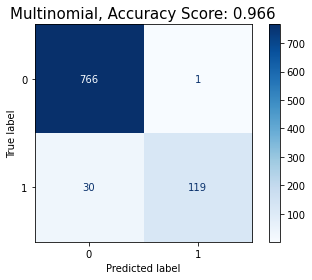

Multinomial, Precision score: 0.9916666666666667
Multinomial, Recall score: 0.7986577181208053


In [12]:
run_multi_naiveBayes(easy_train, easy_test, spam1_train, spam1_test)

### Spam versus hard-ham on Mulinomial Naive Bayes

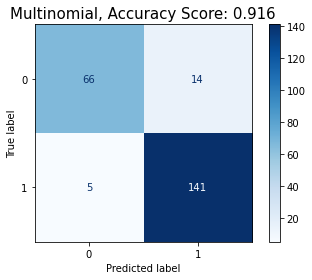

Multinomial, Precision score: 0.9096774193548387
Multinomial, Recall score: 0.9657534246575342


In [13]:
run_multi_naiveBayes(hard_train, hard_test, spam2_train, spam2_test)

## Bernoulli

### Spam versus easy-ham on Bernoulli Naive Bayes

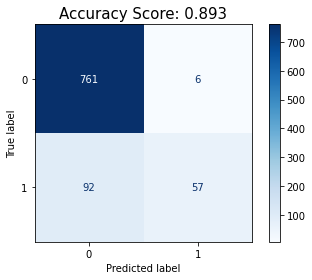

Bernoulli, Precision score: 0.9047619047619048
Bernoulli, Recall score: 0.3825503355704698


In [14]:
run_bern_naiveBayes(easy_train, easy_test, spam1_train, spam1_test)

### Spam versus hard-ham on Bernoulli Naive Bayes

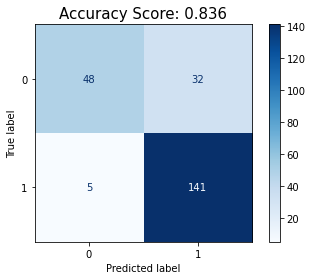

Bernoulli, Precision score: 0.815028901734104
Bernoulli, Recall score: 0.9657534246575342


In [15]:
run_bern_naiveBayes(hard_train, hard_test, spam2_train, spam2_test)

## Most common & least common words in easy-spam dataset

In [16]:
Counter(" ".join(es_df.data).lower().split()).most_common(20)

[('the', 29487),
 ('2002', 24413),
 ('from', 22094),
 ('for', 19790),
 ('with', 19589),
 ('>', 19588),
 ('to', 19378),
 ('by', 18989),
 ('received:', 16520),
 ('of', 15673),
 ('and', 14621),
 ('a', 13120),
 ('sep', 12082),
 ('id', 12025),
 ('esmtp', 9774),
 ('in', 9680),
 ('+0100', 8995),
 ('is', 8207),
 ('that', 6932),
 ('i', 6751)]

In [17]:
mostcommon = Counter(" ".join(es_df.data).lower().split()).most_common()

In [18]:
least_common = reversed(mostcommon)
least_common = tuple(least_common)

In [19]:
least_common[:10]

(('href="http://202.101.163.34:81/ultimatehgh_zeng/remove.php?userid=zzzz@neilgarner.com">',
  1),
 ('subscr<!---->iber<br>', 1),
 ('recei<!--zzzz-->ving', 1),
 ('here</a><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>',
  1),
 ('hg<!---->h', 1),
 ('mon<!--zzzz-->th', 1),
 ('g<!--love-->et', 1),
 ('info<!--you-->rmation', 1),
 ('fre<!--o-->e', 1),
 ('href="http://202.101.163.34:81/ultimatehgh_zeng/index.html">for', 1))

## Most common & least common words in hard-spam dataset

In [20]:
Counter(" ".join(hs_df.data).lower().split()).most_common(20)

[('the', 16222),
 ('to', 11592),
 ('and', 8584),
 ('<td', 8432),
 ('of', 8106),
 ('for', 7608),
 ('a', 7157),
 ('from', 5770),
 ('with', 5632),
 ('in', 5534),
 ('you', 5120),
 ('2002', 5060),
 ('=', 5001),
 ('by', 4945),
 ('<a', 4806),
 ('your', 4061),
 ('>', 3872),
 ('is', 3868),
 ('this', 3536),
 ('received:', 3263)]

In [21]:
tuple(reversed(Counter(" ".join(hs_df.data).lower().split()).most_common()))[:10]

(('22:32:08', 1),
 ('<200209222033.vaa13010@webnote.net>', 1),
 ('21:33:17', 1),
 ('vaa13010', 1),
 ('[212.107.193.66])', 1),
 ('(aurora.marine.su', 1),
 ('21:33:44', 1),
 ('g8mkxic14225', 1),
 ('45c4316f16', 1),
 ('21:56:38', 1))

## Use the parameters in Sklearn’s CountVectorizer to filter out 

In [22]:
#Vectorizing the mails, ignoring words with frequency higher than 90%, words occuring in more than two email, and common english stopwords
cvv = CountVectorizer(max_df = 0.90, min_df = 2, stop_words="english")

In [23]:
def run_multi_naiveBayes_v(ham_train, ham_test, spam_train, spam_test):
    
    X_train = cvv.fit_transform(ham_train)
    x_test = cvv.transform(ham_test)

    y_train = spam_train.astype('int')
    
    multi = MultinomialNB()
    
    multi.fit(X_train, spam_train)
    predm = multi.predict(x_test)
    scorem = accuracy_score(spam_test,predm)
    cmm = confusion_matrix(spam_test, predm)
    dispm = ConfusionMatrixDisplay(confusion_matrix = cmm, display_labels = multi.classes_)
    dispm = dispm.plot(cmap=plt.cm.Blues,values_format='g')
    titlem = 'Multinomial, Accuracy Score after filler out: %.3f' % scorem
    plt.title(titlem, size = 15);
    plt.show()
    print('Multinomial, Precision score:', precision_score(spam_test,predm))
    print('Multinomial, Recall score:', recall_score(spam_test,predm))

In [24]:
def run_bern_naiveBayes_v(ham_train, ham_test, spam_train, spam_test):
    
    X_train = cvv.fit_transform(ham_train)
    x_test = cvv.transform(ham_test)

    y_train = spam_train.astype('int')
    
    bern = BernoulliNB(binarize=0)
    bern.fit(X_train, spam_train)
    
    predb = bern.predict(x_test)
    scoreb = accuracy_score(spam_test,predb)
    cmb = confusion_matrix(spam_test, predb)
    dispb = ConfusionMatrixDisplay(confusion_matrix = cmb, display_labels = bern.classes_)
    dispb = dispb.plot(cmap=plt.cm.Blues,values_format='g')
    titlebv = 'Bernoulli, Accuracy Score after filler out: %.3f' % scoreb
    plt.title(titlebv, size = 15);
    plt.show()
    print('Bernoulli, Precision score:', precision_score(spam_test,predb))
    print('Bernoulli, Recall score:', recall_score(spam_test,predb))    

### Easy-ham vs Spam

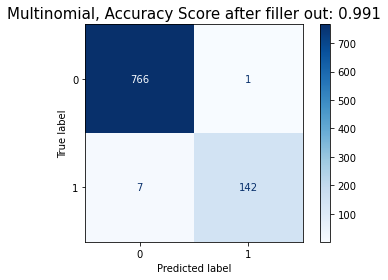

Multinomial, Precision score: 0.993006993006993
Multinomial, Recall score: 0.9530201342281879


In [25]:
run_multi_naiveBayes_v(easy_train, easy_test, spam1_train, spam1_test)

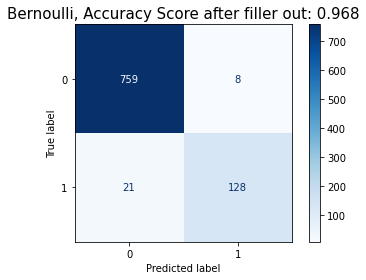

Bernoulli, Precision score: 0.9411764705882353
Bernoulli, Recall score: 0.8590604026845637


In [26]:
run_bern_naiveBayes_v(easy_train, easy_test, spam1_train, spam1_test)

### Hard-ham vs Spam

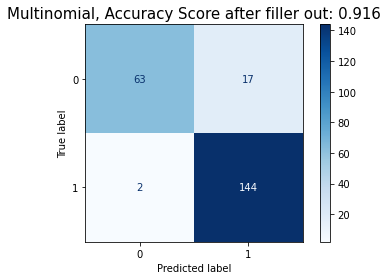

Multinomial, Precision score: 0.8944099378881988
Multinomial, Recall score: 0.9863013698630136


In [27]:
run_multi_naiveBayes_v(hard_train, hard_test, spam2_train, spam2_test)

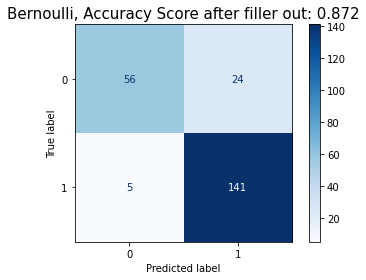

Bernoulli, Precision score: 0.8545454545454545
Bernoulli, Recall score: 0.9657534246575342


In [28]:
run_bern_naiveBayes_v(hard_train, hard_test, spam2_train, spam2_test)

#  Filter out the headers and the footers of the emails 

By investigate in few email we noticed that the header & footer usually started with some string so we decided to remove these lines. 

In [29]:
def remover(df):
    for i in range(len(df.data)):
        for j in range(len(df.data[i].split('\n'))):
            if df.data[i].split('\n')[j].startswith('From'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Return-Path'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('\t'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Received'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Delivered'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('List-'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Date'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('X-'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Message-Id'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('    '):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')                                         
            elif df.data[i].split('\n')[j].startswith('Precedence'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('http'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')                                           
            elif df.data[i].split('\n')[j].startswith('Sender'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')                                           
            elif df.data[i].split('\n')[j].startswith('-------'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')                                           
            elif df.data[i].split('\n')[j].startswith('Subject'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('To'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith("Reply-"):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Errors-To'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('___'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif 'Message-ID' in df.data[i].split('\n')[j]:
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Content'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('Mail-'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('References:'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')
            elif df.data[i].split('\n')[j].startswith('URL:'):
                df.data[i] = df.data[i].replace(df.data[i].split('\n')[j],'')

In [30]:
def removerr(df):
    for i in range(len(df.data)):
        df.data[i] = df.data[i].replace('\n','')

## Clean easy-spam dataset 

In [31]:
remover(es_df)

In [32]:
removerr(es_df)

## Clean hard-spam dataset 

In [33]:
remover(hs_df)

In [34]:
removerr(hs_df)

### Split using the cleaned data sets

In [35]:
# Split the easy&spam data cleaned into training set(70%) and test set (30%)
easy_train, easy_test, spam1_train, spam1_test = train_test_split(es_df.data, es_df.target, test_size=0.3, random_state=0)

In [36]:
# Split the hard&spam data into training set(70%) and test set (30%)
hard_train, hard_test, spam2_train, spam2_test = train_test_split(hs_df.data, hs_df.target, test_size=0.3, random_state=0)

## Using the function from task 3

### Easy-ham versus Spam email

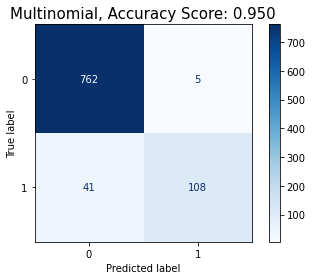

Multinomial, Precision score: 0.9557522123893806
Multinomial, Recall score: 0.7248322147651006


In [37]:
run_multi_naiveBayes(easy_train, easy_test, spam1_train, spam1_test)

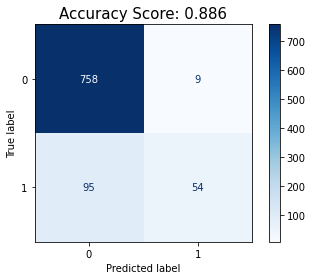

Bernoulli, Precision score: 0.8571428571428571
Bernoulli, Recall score: 0.3624161073825503


In [38]:
run_bern_naiveBayes(easy_train, easy_test, spam1_train, spam1_test)

### Hard-ham versus Spam

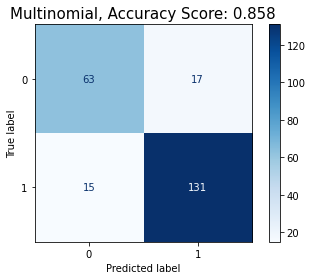

Multinomial, Precision score: 0.8851351351351351
Multinomial, Recall score: 0.8972602739726028


In [39]:
run_multi_naiveBayes(hard_train, hard_test, spam2_train, spam2_test)

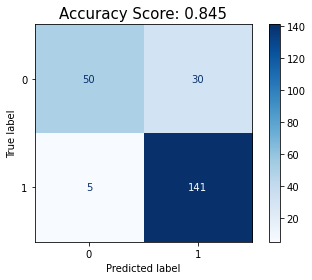

Bernoulli, Precision score: 0.8245614035087719
Bernoulli, Recall score: 0.9657534246575342


In [40]:
run_bern_naiveBayes(hard_train, hard_test, spam2_train, spam2_test)

## Using the function from task 4

### Easy-ham versus Spam email

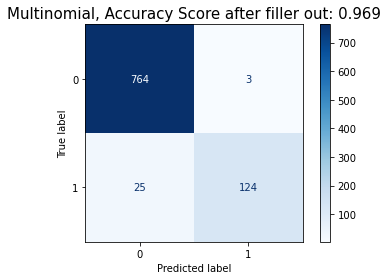

Multinomial, Precision score: 0.9763779527559056
Multinomial, Recall score: 0.8322147651006712


In [41]:
run_multi_naiveBayes_v(easy_train, easy_test, spam1_train, spam1_test)

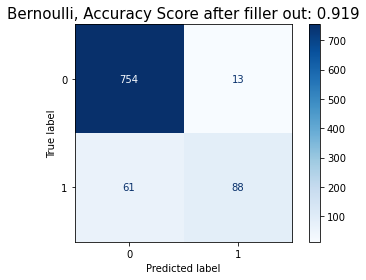

Bernoulli, Precision score: 0.8712871287128713
Bernoulli, Recall score: 0.5906040268456376


In [42]:
run_bern_naiveBayes_v(easy_train, easy_test, spam1_train, spam1_test)

### Hard-ham versus Spam

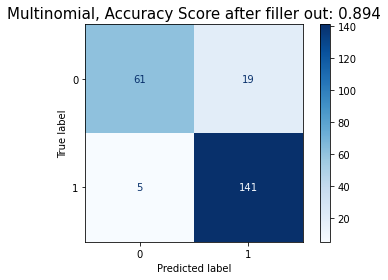

Multinomial, Precision score: 0.88125
Multinomial, Recall score: 0.9657534246575342


In [43]:
run_multi_naiveBayes_v(hard_train, hard_test, spam2_train, spam2_test)

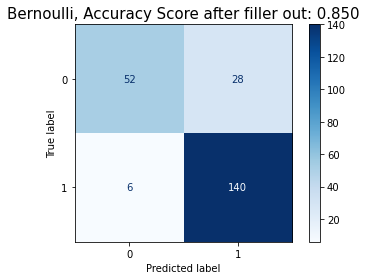

Bernoulli, Precision score: 0.8333333333333334
Bernoulli, Recall score: 0.958904109589041


In [44]:
run_bern_naiveBayes_v(hard_train, hard_test, spam2_train, spam2_test)